In [1]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

2024-05-20 17:31:55.947061: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-20 17:31:55.987593: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 17:31:56.822286: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
import numpy as np
import cv2  # OpenCVライブラリ
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import os
import glob
import sys
import pathlib
from pathlib import Path
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent

In [4]:
import fluid_intake_estimate
from fluid_intake_estimate import data_set
from fluid_intake_estimate import dence_net

/home/s2/Desktop/washino/swallowing


In [5]:
directory_path = parent_dir / 'dataset'

# 鷲野のデータで学習

In [ ]:
path = directory_path / 'washino'

In [6]:
csv_path = path / 'washino.csv'
data = data_set.DataSet(150, 224, 224, 3)
data.csv_to_dataset(path, csv_path, 0)
model = dence_net.DenceNet()

2024-04-24 14:56:43.175971: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22053 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6


In [7]:
model.training(data.X, data.y, 150, 32)

Epoch 1/150


2024-04-24 14:57:04.402431: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-04-24 14:57:06.257123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-04-24 14:57:06.264881: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x8816ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-24 14:57:06.264928: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-04-24 14:57:06.286986: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-24 14:57:06.507129: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proces

5/5 [==============================] - 62s 1s/step - loss: 3.0713 - mean_absolute_error: 1.4199 - mean_squared_error: 3.0713 - val_loss: 225.9474 - val_mean_absolute_error: 14.6703 - val_mean_squared_error: 225.9474
Epoch 2/150
5/5 [==============================] - 0s 96ms/step - loss: 0.4888 - mean_absolute_error: 0.5532 - mean_squared_error: 0.4888 - val_loss: 7233.0342 - val_mean_absolute_error: 83.0979 - val_mean_squared_error: 7233.0342
Epoch 3/150
5/5 [==============================] - 1s 106ms/step - loss: 0.2109 - mean_absolute_error: 0.3610 - mean_squared_error: 0.2109 - val_loss: 356841.7188 - val_mean_absolute_error: 587.6342 - val_mean_squared_error: 356841.7188
Epoch 4/150
5/5 [==============================] - 0s 95ms/step - loss: 0.2134 - mean_absolute_error: 0.2932 - mean_squared_error: 0.2134 - val_loss: 756029.4375 - val_mean_absolute_error: 849.2997 - val_mean_squared_error: 756029.4375
Epoch 5/150
5/5 [==============================] - 1s 100ms/step - loss: 0.2557 

Epoch 37/150
5/5 [==============================] - 0s 96ms/step - loss: 0.0703 - mean_absolute_error: 0.2037 - mean_squared_error: 0.0703 - val_loss: 0.3236 - val_mean_absolute_error: 0.5458 - val_mean_squared_error: 0.3236
Epoch 38/150
5/5 [==============================] - 0s 99ms/step - loss: 0.0593 - mean_absolute_error: 0.1905 - mean_squared_error: 0.0593 - val_loss: 0.2391 - val_mean_absolute_error: 0.4536 - val_mean_squared_error: 0.2391
Epoch 39/150
5/5 [==============================] - 1s 104ms/step - loss: 0.0593 - mean_absolute_error: 0.1958 - mean_squared_error: 0.0593 - val_loss: 0.3621 - val_mean_absolute_error: 0.5309 - val_mean_squared_error: 0.3621
Epoch 40/150
5/5 [==============================] - 0s 97ms/step - loss: 0.0411 - mean_absolute_error: 0.1611 - mean_squared_error: 0.0411 - val_loss: 0.4589 - val_mean_absolute_error: 0.6296 - val_mean_squared_error: 0.4589
Epoch 41/150
5/5 [==============================] - 1s 116ms/step - loss: 0.0364 - mean_absolute_er

5/5 [==============================] - 0s 101ms/step - loss: 0.0219 - mean_absolute_error: 0.1125 - mean_squared_error: 0.0219 - val_loss: 0.3123 - val_mean_absolute_error: 0.5332 - val_mean_squared_error: 0.3123
Epoch 110/150
5/5 [==============================] - 1s 105ms/step - loss: 0.0155 - mean_absolute_error: 0.0912 - mean_squared_error: 0.0155 - val_loss: 0.2595 - val_mean_absolute_error: 0.4847 - val_mean_squared_error: 0.2595
Epoch 111/150
5/5 [==============================] - 1s 112ms/step - loss: 0.0137 - mean_absolute_error: 0.0928 - mean_squared_error: 0.0137 - val_loss: 0.2665 - val_mean_absolute_error: 0.4884 - val_mean_squared_error: 0.2665
Epoch 112/150
5/5 [==============================] - 1s 103ms/step - loss: 0.0198 - mean_absolute_error: 0.1131 - mean_squared_error: 0.0198 - val_loss: 0.2042 - val_mean_absolute_error: 0.4237 - val_mean_squared_error: 0.2042
Epoch 113/150
5/5 [==============================] - 0s 101ms/step - loss: 0.0083 - mean_absolute_error: 0

# 全員のデータで学習し交差検証

In [9]:
names = ['washino', 'haruki', 'ezumi', 'hikaru', 'ibuki', 'kanata', 'kazuki', 'kishimoto', 'kosasayama', 'mocchi', 'nakaryo', 'ruku', 'shibata', 'soichiro', 'tsuji']

data = data_set.DataSet(786, 224, 224, 3)

count = 0

for name in names:    
    path = directory_path / name
    wav_files = glob.glob(os.path.join(path, '*.wav'))
    wav_file_count = len(wav_files)    
    
    csv_path = path / f'{name}.csv'    
    data.csv_to_dataset(path, csv_path, count)
    count += wav_file_count
    print(count)

352
382
413
444
474
504
538
571
601
631
661
694
724
755
786


In [13]:
# 分割交差検証の設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# データを保持するためのリスト
train_data_splits_index = []
test_data_splits_index = []

# データのインデックスを分割
for train_index, test_index in kf.split(data.X):
    train_data_splits_index.append(train_index)
    test_data_splits_index.append(test_index)

In [14]:
y = []
predict = []

In [28]:
model = dence_net.DenceNet()
use_data = 4

model.training(data.X[train_data_splits_index[use_data]], data.y[train_data_splits_index[use_data]], 50, 32)
model.evaluate(data.X[test_data_splits_index[use_data]], data.y[test_data_splits_index[use_data]])
model.save('DenseNet_20240520_model_4_v1.keras')

Epoch 1/50
18/18 [==============================] - 50s 203ms/step - loss: 0.3275 - mean_absolute_error: 0.6305 - mean_squared_error: 0.9067 - val_loss: 25.2999 - val_mean_absolute_error: 25.7989 - val_mean_squared_error: 997.1662
Epoch 2/50
18/18 [==============================] - 2s 125ms/step - loss: 0.0715 - mean_absolute_error: 0.2836 - mean_squared_error: 0.1474 - val_loss: 20.5294 - val_mean_absolute_error: 21.0294 - val_mean_squared_error: 612.2095
Epoch 3/50
18/18 [==============================] - 2s 130ms/step - loss: 0.0543 - mean_absolute_error: 0.2607 - mean_squared_error: 0.1094 - val_loss: 6.2048 - val_mean_absolute_error: 6.6840 - val_mean_squared_error: 69.3766
Epoch 4/50
18/18 [==============================] - 2s 132ms/step - loss: 0.0375 - mean_absolute_error: 0.2239 - mean_squared_error: 0.0749 - val_loss: 0.3920 - val_mean_absolute_error: 0.7483 - val_mean_squared_error: 1.0204
Epoch 5/50
18/18 [==============================] - 2s 130ms/step - loss: 0.0365 - mea

18/18 [==============================] - 2s 122ms/step - loss: 0.0045 - mean_absolute_error: 0.0742 - mean_squared_error: 0.0089 - val_loss: 0.0462 - val_mean_absolute_error: 0.2465 - val_mean_squared_error: 0.0924
Epoch 38/50
18/18 [==============================] - 2s 128ms/step - loss: 0.0068 - mean_absolute_error: 0.0934 - mean_squared_error: 0.0136 - val_loss: 0.0593 - val_mean_absolute_error: 0.2753 - val_mean_squared_error: 0.1187
Epoch 39/50
18/18 [==============================] - 2s 120ms/step - loss: 0.0078 - mean_absolute_error: 0.0945 - mean_squared_error: 0.0157 - val_loss: 0.0590 - val_mean_absolute_error: 0.2699 - val_mean_squared_error: 0.1181
Epoch 40/50
18/18 [==============================] - 2s 122ms/step - loss: 0.0074 - mean_absolute_error: 0.0959 - mean_squared_error: 0.0147 - val_loss: 0.0526 - val_mean_absolute_error: 0.2623 - val_mean_squared_error: 0.1052
Epoch 41/50
18/18 [==============================] - 2s 132ms/step - loss: 0.0078 - mean_absolute_error:

In [29]:
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

In [30]:
print(len(y))

5


In [31]:
array_y = np.concatenate(y)
array_pre = np.concatenate(predict)

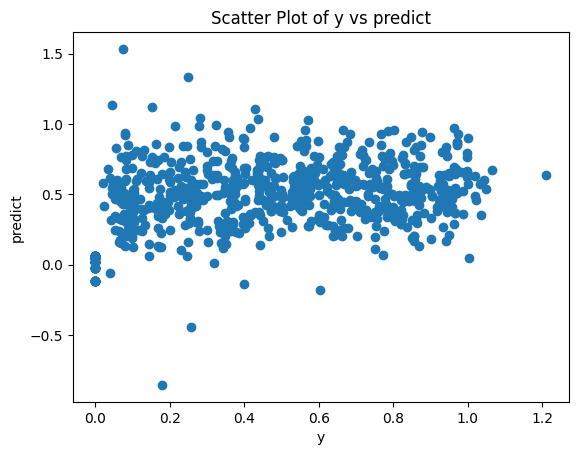

R2 Score: -0.03275016042602963
Mean Absolute Error (MAE): 0.24701303916854866
Root Mean Squared Error (RMSE): 0.3217123352149793


In [32]:
plt.scatter(array_y, array_pre)
plt.xlabel('y')
plt.ylabel('predict')
plt.title('Scatter Plot of y vs predict')
plt.show()

# R2スコアの計算
r2 = r2_score(array_y, array_pre)
print(f"R2 Score: {r2}")

# MAEの計算
mae = mean_absolute_error(array_y, array_pre)
print(f"Mean Absolute Error (MAE): {mae}")

      
      # RMSEの計算
rmse = np.sqrt(mean_squared_error(array_y, array_pre))
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [33]:
array_pre = array_pre.flatten()

In [34]:
combined_array = np.vstack((array_y, array_pre)).T
np.savetxt("DenseNet_20240520.csv", combined_array, delimiter=",", header="y,predict", comments='')